# McElreath & Boyd ch1.4 - ch1end

## Preliminaries
Load [`sympy`](https://docs.sympy.org/latest/index.html) and use the [`init_printing()`](https://docs.sympy.org/latest/modules/interactive.html?highlight=init_printing#sympy.interactive.printing.init_printing) function to tell the notebook that we should print actual equations, rather than statements in computer code.

In [2]:
from sympy import *
init_printing()

# Explit solutions to the haploid recursion equation

## Using `rsolve` in sympy

Sympy's shortcomings become quickly apparent if we want to rederive eq. 1.2 on p19 of McE&B. As described [here](https://docs.sympy.org/latest/modules/solvers/solvers.html#module-sympy.solvers.recurr), we use sympy's [`rsolve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.recurr.rsolve) function to provide an explicit solution of our haploid recursion equation.

First, load all relevant symbols:

In [3]:
f, p, t, wA, wB, pinit  = symbols("f p t wA wB pinit")

We then define $p$ as a function, so that we can later write it as a function of $t$. By doing this, we can let sympy know that `p(t),p(t+1),p(t+2),...` are instances of the same function evaluated at different timepoints `t`. If we wouldn't declare `p` as a function, but just keep it as a simple symbol, sympy would think that `p(t)` is a wholly different symbol than `p(t+1)` and hence we would not be able to solve the recursion (not that we can at this moment)

In [4]:
p = Function('p')

`sympy` (and most numerical solvers) also requires an expression that is equal to 0. Hence, we rewrite $p_{t+1} = p_{t} \frac{w_{A}}{\bar{w}}$ as $p_{t+1} - p_{t} \frac{w_{A}}{\bar{w}} = 0$:

In [5]:
f = p(t+1) - p(t)*wA/(p(t)*wA+(1-p(t))*wB)

rsolve(f,p(t),{p(0):pinit})

ValueError: Polynomial or rational function expected, got '-wA/(wB + (wA - wB)*p(t))'

So an answer is pending here. Currently filing a bug report with sympy on this.

## Transforming and then finding the explicit solution using `rsolve`

Rather than trying to explicitly solve $p_{t+1} = p_{t} \frac{w_{A}}{p_{t} w_{A} + \left (1-p_{t} \right) w_{B}}$, McE&B express this recursion in a different way, by using the numbers of individuals carrying $A$ and $B$ alleles: $n_{A,t+1},n_{B,t+1}$ (see Box 1.3 of McE&B). Using tricks like going from frequencies to absolute numbers or other functions of $p_{t}$ is called a transformation and it can often substantially help solving matters.

Indeed, there is even another transformation that I will discuss here, which also makes solving the haploid recursion equation much easier:
\begin{align}h_{t+1} = p_{t+1} / (1-p_{t+1}).\end{align} (i.e, the ratio of frequencies of alleles $A$ and $B$).
See pp. 195-198 in [Otto & Day](http://lib.exeter.ac.uk/record=b3991619~S6) for a nice description of different transformations in the context of the haploid recursion equation.

The transformation $h_{t+1} = p_{t+1} / \left(1-p_{t+1} \right)$ yields a surprisingly simple recurrence, as $\bar{w}$ cancels out in the numerator and denominator. Let us write \begin{align}h_{t+1} = \frac{p_{t+1}}{1-p_{t+1}} = \frac{p_{t}w_{A}/\bar{w}}{(1-p_{t})w_{B}/\bar{w}} = \frac{p_{t}w_{A}}{(1-p_{t})w_{B}} = h_{t} \frac{w_{A}}{w_{B}}\end{align}

So that we have the explicit solution of our transformed variable $h$: \begin{align}h_{t+2} &= h_{t}\left (\frac{w_{A}}{w_{B}}\right)^{2}\quad \text{and by iteration we get...}\\
h_{t} &= h_{0} \left (\frac{w_{A}}{w_{B}}\right)^{t}
\end{align}

Next, we can then back-transform by writing our solution in terms of $p$ instead of $h$ by solving $h_{t} = p_{t}/(1-p_{t})$ for $p_{t}$. This yields $p_{t} = h_{t}/(1+h_{t})$. Hence we have:
\begin{align}
p_{t} = \frac{h_{t}}{1+h_{t}} &= \frac{h_{0} \left (\frac{w_{A}}{w_{B}} \right )^{t}}{1 + h_{0} \left (\frac{w_{A}}{w_{B}} \right )^{t}} \\
&= \frac{\frac{p_{0}}{1-p_{0}} \left (\frac{w_{A}}{w_{B}} \right )^{t}}{1 + \frac{p_{0}}{1-p_{0}} \left (\frac{w_{A}}{w_{B}} \right )^{t}} \quad \text{because }h_{0} = p_{0}/(1-p_{0})\\
&= \frac{1}{\frac{1-p_{0}}{p_{0}} \left (\frac{w_{B}}{w_{A}} \right )^{t} + 1} \quad \text{because multiplying by: } \frac{\frac{1-p_{0}}{p_{0}} \left (\frac{w_{B}}{w_{A}} \right )^{t}}{\frac{1-p_{0}}{p_{0}} \left (\frac{w_{B}}{w_{A}} \right )^{t}}=1\\
&= \frac{1}{\frac{n_{B,0}/n}{n_{A,0}/n} \left (\frac{w_{B}}{w_{A}} \right )^{t} + 1} \quad \text{eq. (1.2)}
\end{align}

**Bottom line**: transformations like $h_{t} = p_{t}/(1-p_{t})$ (ratio of allele frequencies) or $g(t) = p_{t} - \hat{p}$ (distance from equilibrium allele frequency) can often be useful when finding solutions to complex recursions.

We also see that `sympy` does not choke on this transformed solution:

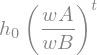

In [33]:
h, h0, p0 = symbols("h h0 p0")

# again, define h as a function so that sympy recognizes 
#  that h(t) and h(t+1) are the same function at different timepoints 
# rather than different symbols:
h = Function('h') 

# our transformed recurrence eqn, when set equal to 0 (rsolve needs things to be equal to 0, don't ask me why)
f = h(t+1) - h(t)*wA/wB

# use the rsolve() command to find the solution for begin value h0
hsol=rsolve(f,h(t),{h(0):h0})

# print the solution:
hsol

Now back-transform the expression of $h_{t}$ back to $p_{t}$, first by substituting for $h_{0} = p_{0} / \left (1 - p_{0} \right )$ in $h_{t}$:

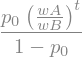

In [34]:
hsol_sub=hsol.subs(h0,p0/(1-p0))

# print outcome
hsol_sub

Next, we calculate $p_{t} = h_{t} / \left (1 + h_{t} \right )$

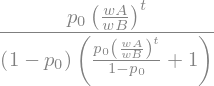

In [35]:
ptexplicit=hsol_sub/(1+hsol_sub)

# print the explicit solution
ptexplicit

And we are done (one can check with pen and paper that this is eq. 1.2). 

### Plotting the recursion equation

We can now plot the equation above:

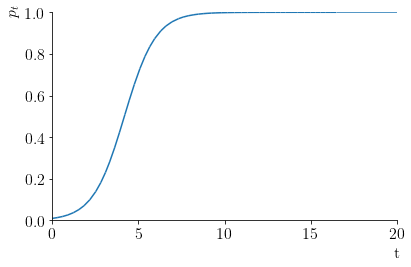

In [44]:
from sympy.plotting import plot

# first substitute for the parameters wA, wB 
# and the initial value p0
ptexpl_subs = ptexplicit.subs([(wA, 1.5), (wB, 0.5),(p0,0.01)])

# then plot it
plot(ptexpl_subs, (t, 0,20), xlabel=t, ylabel="$p_{t}$")

Some warnings, but at least there is a plot. 

# Solving for equilibria (i.e., where $\Delta p = 0$)

Rather than solving for the explicit solution of $p_{t+1}$ as above, we will now solve for the equilibria of the haploid recurrence equation, using sympy's [`solve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve) function. We can use `solve(f,x)` to solve a formula `f` for equilibria of the variable `p`. In other words: solve the formula for those values of `p`, either given as functions or numbers for which `f=0`.

However, to do so, `p` itself has to be a variable and not a function. In the section above, we defined `p` as a function, rather than as just a symbol. So we will first have to delete `p` from sympy's memory and then redefine it again using the `symbols()` command.


If we have done so, we then solve the expression $\Delta p = p(1-p)\frac{wA-wB}{\bar{w}} = 0$ for $p$:

In [11]:
# delete symbol p from memory
del globals()["p"]

# redefine it as 'just' as symbol
p = symbols("p")

# define delta p:
deltap = p*(1-p)*(wA-wB)/(p*wA + (1-p)*wB)

# solve() deltap == 0 for p
# solve() automatically assumes that the formula you give it should equal 0)
solve(deltap,p)

Indeed, we have equilibria $\hat{p}=0$ and $\hat{p}=1$ where $\hat{}$ denotes that the value of $p$ is an equilibrium.

# Cobweb plots using `matplotlib`

While the cobweb plots in Figure 1.3 of McE&B are not a standard feature of any graphics package, a lot of code exists on the internet to easily make one. Here an example from [here](https://scipython.com/blog/cobweb-plots/). It is not necessary to understand every bit of the code below (but I'd be happy to help if you want to understand it), just the lines at the end.

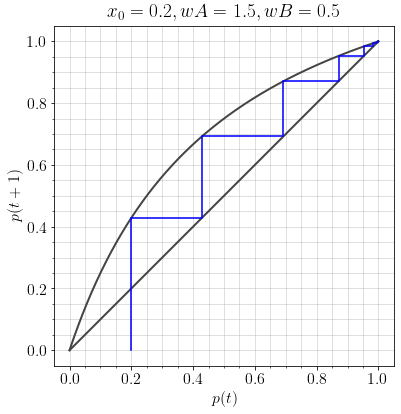

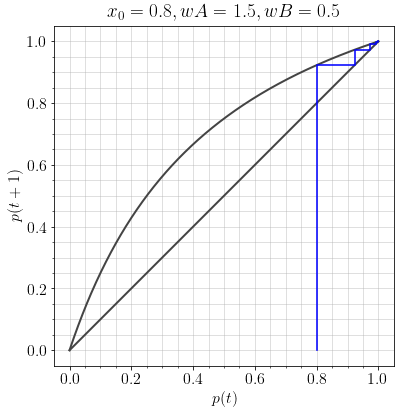

In [14]:

# import some packages

# numpy is a numerical library in python
# allowing one to do numerical things (random numbers, arrays, linear algebra, etc)
# see https://numpy.org/doc/stable/user/quickstart.html
import numpy as np

# import some graphics parameters from numpy (determining font & text)
from matplotlib import rc

# some additional functions from numpy
import matplotlib.pyplot as plt

# Use LaTeX throughout the figure for consistency
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, wA, wB, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, wA, wB), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], wA, wB)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$p(t)$')
    ax.set_ylabel(f.latex_label)
    ax.set_title('$x_0 = {:.1}, wA = {:.2}, wB = {:.3}$'.format(x0, wA, wB))

    plt.show()

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

# define the recursion equation as a lambda (i.e., shorthand) function: p*wA / (p*wA + (1-p)*wA)
func = AnnotatedFunction(lambda x,wA,wB: x*wA/(x*wA+(1-x)*wB), r"$p(t+1)$")

# now produce the cobweb plots by calling the function plot_cobweb()
# the first argument here is the recursion equation and the other arguments
# are the parameters wA, wB and the initial value of p, here called x0.
plot_cobweb(f=func, wA=1.5, wB=0.5, x0=0.2)
plot_cobweb(f=func, wA=1.5, wB=0.5, x0=0.8)